In [15]:
#1.필요한 module import 
import tensorflow as tf 

#2. training data set (학습데이터 설정하기)
xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

#3. placeholder(tensorflow그래프에 입력을 주기위한 파라미터 기능)
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

#4. Weight, bias 범위 지정하기
W = tf.Variable(tf.random_uniform([1], -100, 100))
b = tf.Variable(tf.random_uniform([1], -100, 100))

#5. 가설을 하나 지정해주기 
H = W * X + b

#6. 비용함수 선언
cost = tf.reduce_mean(tf.square( H - Y ))

#7. (경사하강법에 적용할)learning rate지정하기(학습시 얼마나 점진적으로 다음값을 지정할지)
a = tf.Variable(0.01)

#7. 경사하강법을 쓰겠다고 선언
optimizer = tf.train.GradientDescentOptimizer(a)

#8. 학습방식: 비용을 최소화하는 방향으로
train = optimizer.minimize(cost)
init = tf.global_variables_initializer() #변수 초기화(초기변수 설정) 
sess = tf.Session()#세션 초기화 
sess.run(init)

#9. 학습시작 : 5000번 시행해보자 
for i in range(5001):
    sess.run(train, feed_dict={X: xData, Y: yData})
    if i % 500 == 0:
        print("{} 번째, 비용: {}, W값: {}, b값 : {}" .format(i, sess.run(cost, feed_dict={X: xData, Y:yData}), sess.run(W), sess.run(b)))
        #500번 돌때마다 세션 순번, 비용, W, b값 출력 
print(sess.run(H, feed_dict = {X: [8]}))

0 번째, 비용: 4571669504.0, W값: [10399.5625], b값 : [2122.3586]
500 번째, 비용: 8688462.0, W값: [25536.207], b값 : [1956.6957]
1000 번째, 비용: 8633841.0, W값: [25627.316], b값 : [1505.5315]
1500 번째, 비용: 8632679.0, W값: [25640.592], b값 : [1439.7909]
2000 번째, 비용: 8632649.0, W값: [25642.527], b값 : [1430.2059]
2500 번째, 비용: 8632652.0, W값: [25642.805], b값 : [1428.8225]
3000 번째, 비용: 8632657.0, W값: [25642.844], b값 : [1428.6338]
3500 번째, 비용: 8632656.0, W값: [25642.848], b값 : [1428.6133]
4000 번째, 비용: 8632656.0, W값: [25642.848], b값 : [1428.6133]
4500 번째, 비용: 8632656.0, W값: [25642.848], b값 : [1428.6133]
5000 번째, 비용: 8632656.0, W값: [25642.848], b값 : [1428.6133]
[206571.39]


In [96]:
## Ozone.csv 를 통해 특정 온도에서의 오존량을 예측하는 모델을 도출하라
## Ozone.csv : "Ozone", "Solar.R", "Wind", "Temp", "Month", "Day"
import tensorflow as tf 
import numpy as np
import pandas as pd
 
ozone_df = pd.read_csv("./data/ozone.csv")
display(ozone_df)

#1. 필요한 col만 불러오기 : 온도, 오존량 
df1 = ozone_df.loc[:,["Ozone","Temp"]]
display(df1)


#※ 인덱스를 행으로 바꿔버리기(Ozone)
#df1=df1.reset_index(level=0, inplace=True)
#df1['Ozone'] = df1.index
#display(df1)

#2. 결측이 있는 행 제거 
df1= df1.dropna()
display(df1)
display(df1['Temp'])
display(df1['Ozone'])

#df1 = df1.drop(["Ozone"]== "NaN",axis=0, inplace=False)
#display(df1)
#df1.isnull().sum()


Ozone =df1.Temp.tolist()
Temp = df1.Ozone.tolist() 
#print(Ozone)
#print(Temp)

#4. 변수선언(기온, 오존)
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

#5. Weight, bias 범위 지정하기
W = tf.Variable(tf.random_uniform([1], -100, 100))
b = tf.Variable(tf.random_uniform([1], -100, 100))

#6. 가설을 하나 지정해주기 
H = W * X + b

#7. 비용함수 선언
cost = tf.reduce_mean(tf.square( H - Y ))

#8. (경사하강법에 적용할)learning rate지정하기(학습시 얼마나 점진적으로 다음값을 지정할지)
a = tf.Variable(0.0001)

#9. 경사하강법을 쓰겠다고 선언
optimizer = tf.train.GradientDescentOptimizer(a)

#10. 학습방식: 비용을 최소화하는 방향으로
train = optimizer.minimize(cost)
init = tf.global_variables_initializer() #변수 초기화(초기변수 설정) 
sess = tf.Session()#세션 초기화 
sess.run(init)

#11. 학습시작 : 10000번 시행해보자 
for i in range(30001):
    sess.run(train, feed_dict={X: Temp, Y: Ozone})
    if i % 500 == 0:
        print("{} 번째, 비용: {}, W값: {}, b값 : {}" .format(i, sess.run(cost, feed_dict={X: Temp, Y: Ozone}), sess.run(W), sess.run(b)))
        #500번 돌때마다 세션 순번, 비용, W, b값 출력 
print(sess.run(H, feed_dict = {X: [98]}))



,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
4,NaN,56
...,...,...
148,30.0,70
149,NaN,77
150,14.0,75
151,18.0,76


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


0      67
1      72
2      74
3      62
5      66
       ..
147    63
148    70
150    75
151    76
152    68
Name: Temp, Length: 116, dtype: int64

0      41.0
1      36.0
2      12.0
3      18.0
5      28.0
       ... 
147    14.0
148    30.0
150    14.0
151    18.0
152    20.0
Name: Ozone, Length: 116, dtype: float64

0 번째, 비용: 112223.15625, W값: [6.0689955], b값 : [96.09985]
500 번째, 비용: 293.6468505859375, W값: [-0.17732489], b값 : [95.02089]
1000 번째, 비용: 275.59381103515625, W값: [-0.16329885], b값 : [94.070946]
1500 번째, 비용: 258.8552551269531, W값: [-0.14979325], b값 : [93.15624]
2000 번째, 비용: 243.3351287841797, W값: [-0.1367885], b값 : [92.27545]
2500 번째, 비용: 228.94613647460938, W값: [-0.12426687], b값 : [91.4274]
3000 번째, 비용: 215.60421752929688, W값: [-0.11220937], b값 : [90.61077]
3500 번째, 비용: 203.23326110839844, W값: [-0.10059858], b값 : [89.8244]
4000 번째, 비용: 191.7633514404297, W값: [-0.08941892], b값 : [89.06722]
4500 번째, 비용: 181.12782287597656, W값: [-0.07865319], b값 : [88.33808]
5000 번째, 비용: 171.2673797607422, W값: [-0.06828742], b값 : [87.63603]
5500 번째, 비용: 162.12527465820312, W값: [-0.05830661], b값 : [86.96006]
6000 번째, 비용: 153.64759826660156, W값: [-0.04869458], b값 : [86.30907]
6500 번째, 비용: 145.7882843017578, W값: [-0.03944058], b값 : [85.68231]
7000 번째, 비용: 138.5008544921875, W값: [-0.03052933], b값 : [85.07877]
7

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


읽어들인 데이터의 shape : (153, 6)
결측치를 제거한 후 남은 데이터 : (116, 2)
131.125
이상치를 제거한 후 남은 데이터 : (114, 2)
cost값은 : 944.1588745117188
cost값은 : 676.219970703125
cost값은 : 675.7024536132812
cost값은 : 675.1857299804688
cost값은 : 674.6699829101562
cost값은 : 674.1552124023438
cost값은 : 673.6412963867188
cost값은 : 673.1282958984375
cost값은 : 672.6162109375
cost값은 : 672.1049194335938
cost값은 : 671.5947875976562
cost값은 : 671.0852661132812
cost값은 : 670.5768432617188
cost값은 : 670.0692749023438
cost값은 : 669.5625610351562
cost값은 : 669.0568237304688
cost값은 : 668.5518188476562
cost값은 : 668.0478515625
cost값은 : 667.544677734375
cost값은 : 667.04248046875
cost값은 : 666.5410766601562
cost값은 : 666.0407104492188
cost값은 : 665.5410766601562
cost값은 : 665.0422973632812
cost값은 : 664.5444946289062
cost값은 : 664.0474853515625
cost값은 : 663.5514526367188
cost값은 : 663.0562744140625
cost값은 : 662.56201171875
cost값은 : 662.0684814453125
cost값은 : 661.575927734375
cost값은 : 661.0841674804688
cost값은 : 660.5933227539062
cost값은 : 660.1033325195312
co

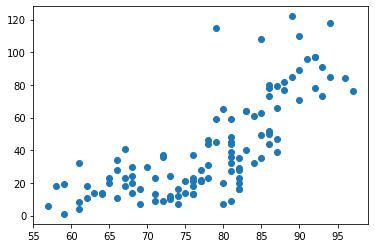

In [94]:
## 강사님 해설 
## 온도에 따른 Ozone 데이터를 학습한 후 Prediction 까지 진행 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# 학습데이터를 확보해서 전처리 과정을 거쳐야 한다. 
df = pd.read_csv("./data/ozone.csv")
display(df)
df.shape
print("읽어들인 데이터의 shape : {}" .format(df.shape))

# 결측치 제거 시 다른 column에 의해서 너무 많은 행이 제거되는걸 방지하기 위해 필요한 column 만 추출 
df = df[["Ozone","Temp"]]

# 결측치 제거하기 
df = df.dropna(how='any', inplace=False)
print("결측치를 제거한 후 남은 데이터 : {}" .format(df.shape))

# 이상치 제거하기
# 각 column(온도와 오존)에 대해서 boxplot을 그려보아요 

#plt.boxplot(df["Temp"])  #온도는 이상치가 존재하지 않다 
#plt.boxplot(df["Ozone"])  #극단치가 2개 정도 보인다(요인이 있을 수 도 있지만 지워주자(가중치로 인한 왜곡방지))

# 이상치를 찾기 위해서 Tukey Fence 방식을 이용(IRQ방식 이용)
# IRQ값은 '3사분위 값' - '1사분위 값' 을 계산해서 구한다. 
# 만약 (3사분위 값 + IRQ *1.5) 를 초과하는 값이 존재한다면 그것은 이상치로 간주 
# 만약 (1사분위 값 - IRQ *1.5) 미만의 값이 존재하면 그것도 이상치로 간주 

np.percentile(df["Ozone"], 25) #1사분위 값 출력 
np.percentile(df["Ozone"], 75) #3사분위 값 출력
q1,q3 = np.percentile(df["Ozone"],[25,75])
irq = q3 - q1
upper = q3 + irq*1.5
print(upper) #131.125
             #broadcasting을 통해 mask로 사용할 것 

mask = df["Ozone"] > upper 
#df.loc[mask] #61번째, 116번째 값 출력 
#df.loc[~mask] #61번째, 116번째 값만 빼고 출력 
df = df.loc[~mask]
print("이상치를 제거한 후 남은 데이터 : {}" .format(df.shape))
df.head()

#linear regression을 하기 전에 데이터의 경향성을확인 
#산점도(scatter)를 이용해서 데이터의 경향성을 확인해보아요! 
plt.scatter(df["Temp"],df["Ozone"]) #우상향 경향 확인 
                                    #온도가 높아질 수 록 오존량이 증가한다. 
    
    
#########################################    

# linear regression 시작
# 1. training data set 준비 
x_data = df["Temp"]
y_data = df["Ozone"]

# 2.필요노드들 생성하기 
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 3. Weight, bias 
W = tf.Variable(tf.random_normal([1]), name ="weight")
b = tf.Variable(tf.random_normal([1]), name ="bias")

# 4. 가설(Hypothesis) 정의
H = W * x + b 

# 5. cost function 정의 
cost = tf.reduce_mean(tf.square(H-y))

# 6. train 
a = tf.Variable(0.0001)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

# 7. session 초기화 작업 
init = tf.global_variables_initializer() #변수 초기화(초기변수 설정) 
sess = tf.Session()#세션 초기화 
sess.run(init)

# 8. 학습시작  
for step in range(30001):
    _,cost_val=sess.run([train,cost],  #cost값만 보기 
             feed_dict = {x : x_data,
                          y : y_data})
    if step % 300 ==0:
        print("cost값은 : {}".format(cost_val))
print(sess.run(H, feed_dict = {x: [80]}))



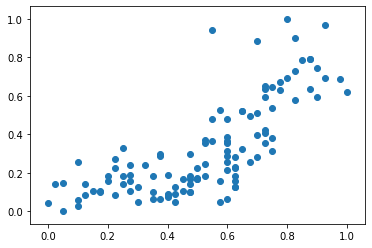

In [103]:
##learning rate 와 횟수를 조정함에도 비용이 0에 도저히 가까워지지 않는거 같다?
##정제된 데이터를 정규화나 표준화를 이용해서 값의 범위를 조절해야 한다. => 학습을 정상화시키기
##데이터를 표준화 방식으로 다시 만들어서 학습을 진행 
'''
Normalization(표준화) : 
각 데이터를 다음과 같은 방식으로 비율적으로 축소시키는 방법 
각 요소의 값 => (요소값 - 전체데이터의 최소값) / (전체 데이터의 최대값 - 전체 데이터의 최소값)

'''
df["Temp_Norm"] = (df["Temp"]-df["Temp"].min()) / (df["Temp"].max()-df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"]-df["Ozone"].min()) / (df["Ozone"].max()-df["Ozone"].min())

#확인작업 
#plt.scatter(df["Temp"],df["Ozone"])
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"]) #plot이 같이 출력된다.(따로따로 주석처리하고 볼 것)

In [119]:
## 정규화한 데이터로 다시 학습 시키자  
## normalization 한 데이터로 학습 데이터
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# linear regression 시작
# 1. training data set 준비 
x_data = df["Temp_Norm"]
y_data = df["Ozone_Norm"]

# 2.필요노드들 생성하기 
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 3. Weight, bias 
W = tf.Variable(tf.random_normal([1]), name ="weight")
b = tf.Variable(tf.random_normal([1]), name ="bias")

# 4. 가설(Hypothesis) 정의
H = W * x + b 

# 5. cost function 정의 
cost = tf.reduce_mean(tf.square(H-y))

# 6. train 
a = tf.Variable(0.00001)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

# 7. session 초기화 작업 
init = tf.global_variables_initializer() #변수 초기화(초기변수 설정) 
sess = tf.Session()#세션 초기화 
sess.run(init)

# 8. 학습시작  
for step in range(30001):
    _,cost_val=sess.run([train,cost],  #cost값만 보기 
             feed_dict = {x : x_data,
                          y : y_data})
    if step % 300 ==0:
        print("cost값은 : {}".format(cost_val))
print(sess.run(H, feed_dict = {x: [80]}))


cost값은 : 0.27909567952156067
cost값은 : 0.27525222301483154
cost값은 : 0.27146121859550476
cost값은 : 0.26772305369377136
cost값은 : 0.26405295729637146
cost값은 : 0.2604324221611023
cost값은 : 0.25686341524124146
cost값은 : 0.2533588111400604
cost값은 : 0.24990148842334747
cost값은 : 0.24649310111999512
cost값은 : 0.24314694106578827
cost값은 : 0.23984594643115997
cost값은 : 0.2365901619195938
cost값은 : 0.23339557647705078
cost값은 : 0.23024426400661469
cost값은 : 0.22713546454906464
cost값은 : 0.22408393025398254
cost값은 : 0.2210758775472641
cost값은 : 0.21810828149318695
cost값은 : 0.2151917964220047
cost값은 : 0.21232078969478607
cost값은 : 0.2094886302947998
cost값은 : 0.20669986307621002
cost값은 : 0.20396016538143158
cost값은 : 0.2012576013803482
cost값은 : 0.19859150052070618
cost값은 : 0.19597592949867249
cost값은 : 0.19339729845523834
cost값은 : 0.19085361063480377
cost값은 : 0.18835040926933289
cost값은 : 0.18589064478874207
cost값은 : 0.18346402049064636
cost값은 : 0.18107019364833832
cost값은 : 0.1787208914756775
cost값은 : 0.17640645802

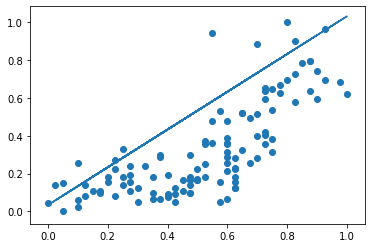

In [120]:
# 학습이 종료된 후 최종적으로 얻은 W와 B의 값을 이용하여 line graph를 산점도와 함께 그려보기
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"])
plt.plot(df["Temp_Norm"], df["Temp_Norm"] * sess.run(W) + sess.run(b)) #node는 세션이 없으면 값을 얻을 수 없다
#결과는 게속 달라질 수 있다. 

In [135]:
# 학습이 끝났으니.. Prediction을 해 보자
# 화씨 81도 에서 오존량을 예측해보자 
tmp = (81 - df["Temp"].min()) / (df["Temp"].max()-df["Temp"].min())
result_norm = sess.run(H, feed_dict = {x: tmp})
result = result_norm * (df["Ozone"].max()-df["Ozone"].min()) + df["Ozone"].min()
print(result)

[77.5411]
